In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vuppalaadithyasairam/bone-fracture-detection-using-xrays")

print("Path to dataset files:", path)

100%|██████████| 172M/172M [00:01<00:00, 91.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays/versions/1


In [ ]:
import os

# List the contents of the directory using os.listdir
contents = os.listdir(path)

# Print the contents
print(contents)

['archive (6)']


In [3]:
import os

# Correct way to list files in a subdirectory
subdirectory_path = os.path.join(path, 'archive (6)')  # Combine path with subdirectory name
contents = os.listdir(subdirectory_path)  # Call listdir with the combined path

# Print the contents
print(contents)

['train', 'val']


In [4]:
#create paths for val and train data
train_path = os.path.join(subdirectory_path, 'train')
val_path = os.path.join(subdirectory_path, 'val')

Displaying images from: fractured


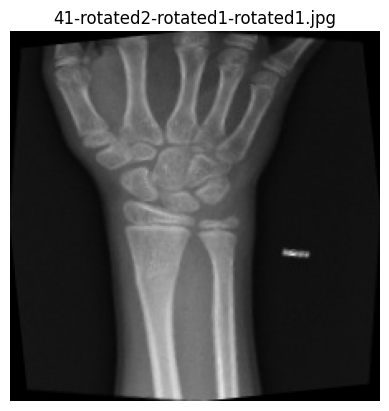

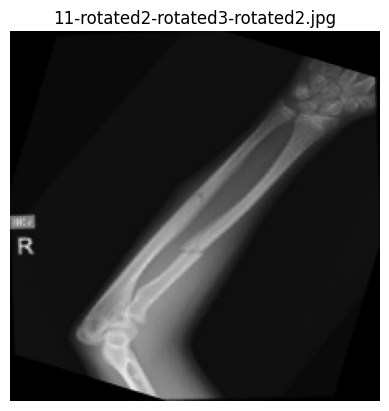

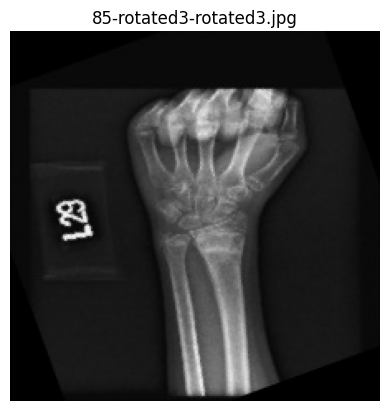

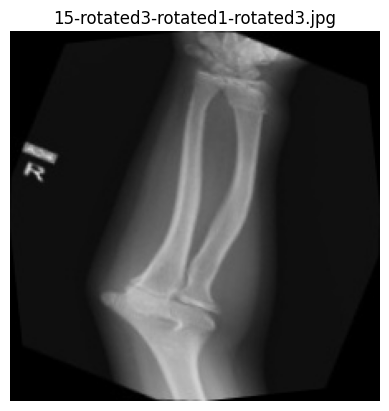

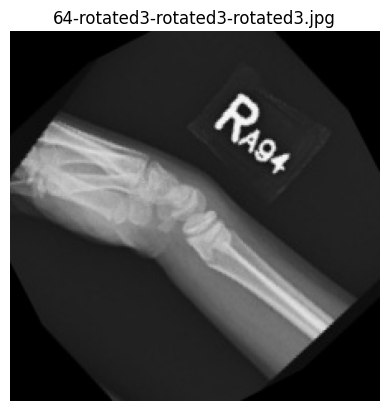

Displaying images from: not fractured


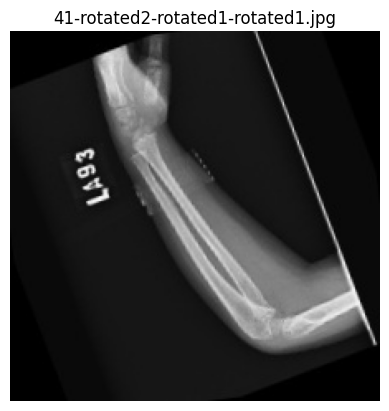

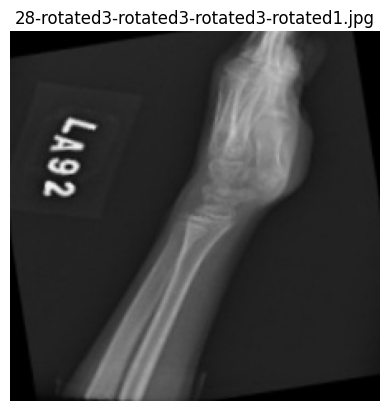

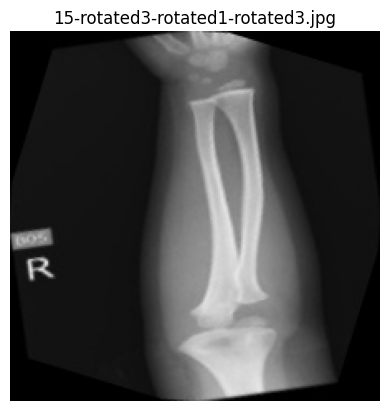

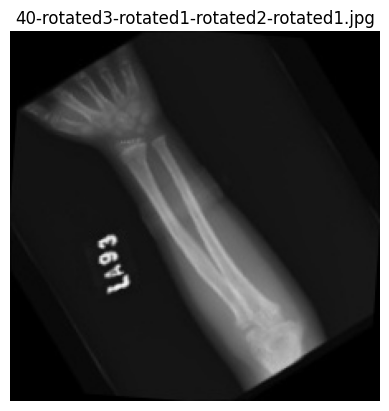

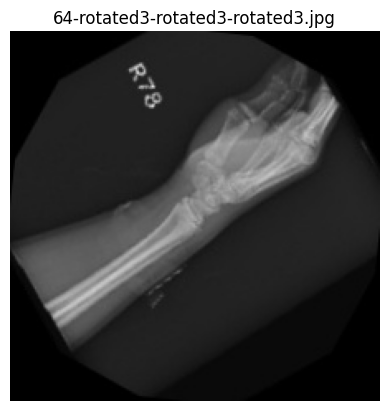

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Point train_path to the "train" directory
train_path = os.path.join(path, "archive (6)", "train")

# Get the subdirectories (fracture, not fractured) within "train"
subdirectories = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

# Display images from each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(train_path, subdir)
    sample_images = os.listdir(subdir_path)[:5]  # Get 5 sample images

    print(f"Displaying images from: {subdir}") # Print subdirectory name

    for img_name in sample_images:
        img_path = os.path.join(subdir_path, img_name)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis("off")
        plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the augmentations
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Horizontal flip
    fill_mode='nearest'  # Fill pixels outside the boundaries
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)  # No augmentation for validation, just rescaling

# Set up data generators for train and validation directories
train_generator = train_datagen.flow_from_directory(
    train_path,  # Train directory
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,  # Batch size
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    val_path,  # Validation directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=0.0001)

model.fit(train_generator, epochs=10, callbacks=[lr_scheduler])



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


277/277 ━━━━━━━━━━━━━━━━━━━━ 143s 453ms/step - accuracy: 0.5406 - loss: 0.7173 - learning_rate: 0.0010
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


277/277 ━━━━━━━━━━━━━━━━━━━━ 112s 396ms/step - accuracy: 0.6389 - loss: 0.6332 - learning_rate: 0.0010
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 114s 399ms/step - accuracy: 0.6893 - loss: 0.5846 - learning_rate: 0.0010
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 117s 414ms/step - accuracy: 0.7109 - loss: 0.5539 - learning_rate: 0.0010
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 140s 402ms/step - accuracy: 0.7278 - loss: 0.5376 - learning_rate: 0.0010
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 112s 393ms/step - accuracy: 0.7262 - loss: 0.5333 - learning_rate: 0.0010
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 142s 397ms/step - accuracy: 0.7496 - loss: 0.5001 - learning_rate: 0.0010
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 113s 396ms/step - accuracy: 0.7437 - loss: 0.5002 - learning_rate: 0.0010
Epoch 9/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 117s 413ms/step - accuracy: 0.7648 - loss: 0.4832 - learning_rate: 0.0010
Epoch 10/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 114s 401ms/step - accuracy: 0.7713 - loss: 0.4701 - learni

In [14]:
predictions = model.predict(valid_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 747ms/step


In [15]:
# Predict the class probabilities for the validation data
predictions = model.predict(valid_generator, verbose=1)

# If you're using sparse categorical cross-entropy (integer labels), you can use argmax to get the predicted class
predicted_classes = predictions.argmax(axis=-1)  # For multi-class classification


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step


In [16]:
predicted_classes

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess a single image
img_path = '/content/hand.jpeg'
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.0  # Rescale as needed (same as training)

# Make a prediction
prediction = model.predict(img_array)
predicted_class = prediction.argmax(axis=-1)
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: [0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


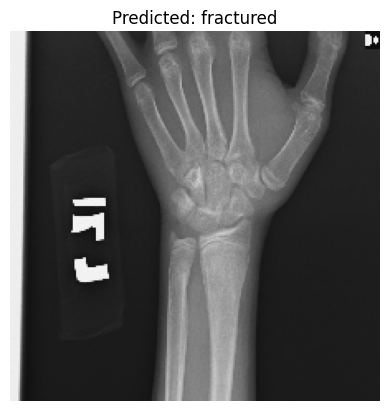

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '/content/num4.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.0  # Rescale as needed (same as training)

# Make a prediction
prediction = model.predict(img_array)
predicted_class = prediction.argmax(axis=-1)

# Retrieve the class label (you can map it back to a class name if needed)
class_labels = valid_generator.class_indices  # This will give you a dictionary with class indices
class_labels = {v: k for k, v in class_labels.items()}  # Invert the dictionary
predicted_class_label = class_labels[predicted_class[0]]  # Get the predicted class label

# Plot the image and the prediction
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')  # Turn off axes
plt.show()


In [25]:
# Save the model
model.save('my_model.keras')  # This saves the model in the current directory with the name 'my_model'


In [26]:
# Save the model as an HDF5 file
model.save('my_model.h5')  # This saves the model as a single HDF5 file


In [27]:
from google.colab import files

# If the model is saved in HDF5 format
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>